# GemPy 3-D Visualization

In [1]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../../../")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt

## Loading an example geomodel

In [2]:
geo_model = gp.create_data(
    [0,2000,0,2000,0,1600], 
    [50,50,50],
    path_o = os.path.abspath("../../data/input_data/lisa_models/foliations"+str(7)+".csv"),
    path_i = os.path.abspath("../../data/input_data/lisa_models/interfaces"+str(7)+".csv")
)

gp.map_series_to_surfaces(
    geo_model, 
    {"Fault_1": 'Fault_1', "Fault_2":'Fault_2',
     "Strat_Series":('Sandstone','Siltstone','Shale', 'Sandstone_2', 'Schist', 'Gneiss')}
)

geo_model.set_is_fault(['Fault_1', 'Fault_2'])

gp.set_interpolation_data(geo_model)
gp.compute_model(geo_model, compute_mesh=True)

Active grids: ['regular']


../../..\gempy\core\data.py:1742: UserWarning: If pole_vector and orientation are passed pole_vector is used/
  warnings.warn('If pole_vector and orientation are passed pole_vector is used/')


Fault colors changed. If you do not like this behavior, set change_color to False.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  2
Compilation Done!


../../..\gempy\core\solution.py:266: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'.
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e)+'.')



Lithology ids 
  [9. 9. 9. ... 3. 3. 3.] 

## Basic plotting API

### Data plot

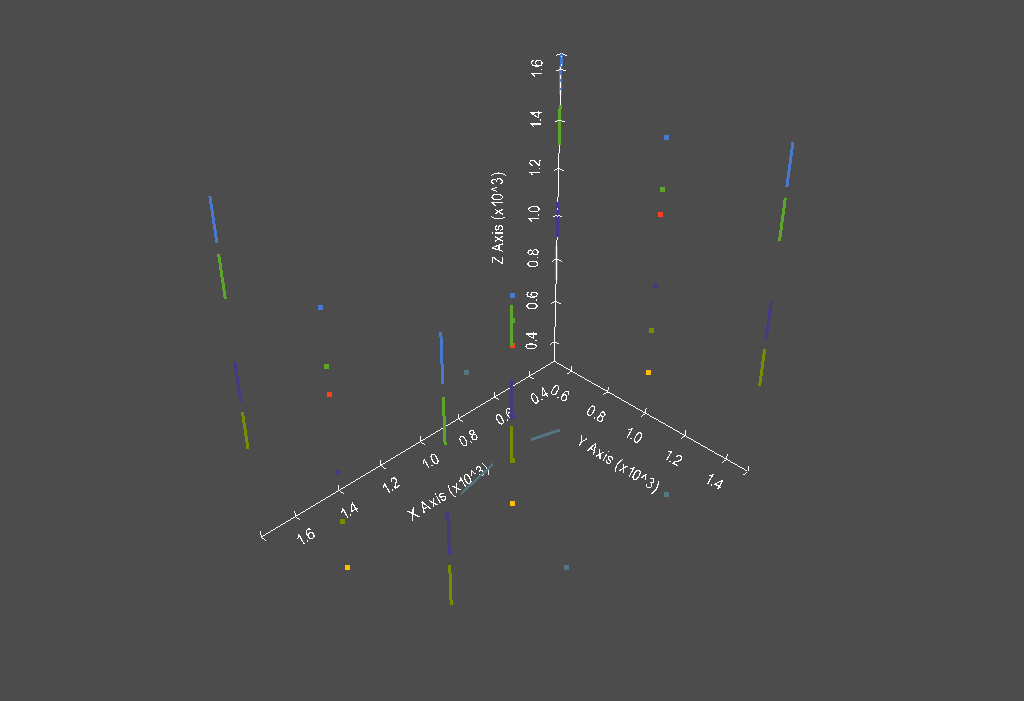

In [3]:
gp._plot.plot_data_3d(geo_model)

### Geomodel plot

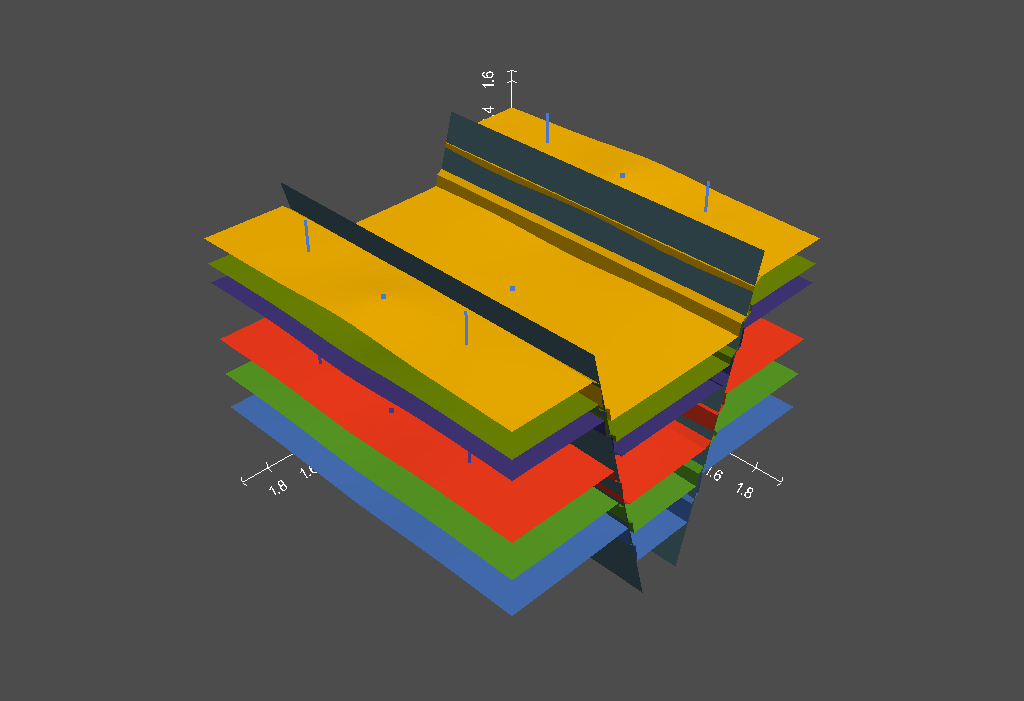

In [4]:
gp._plot.plot_3d(geo_model)

### Interactive plot

Passing the `notebook=False` keyword argument will run the pyvista visualization in an external window, allowing for interactivity:

In [28]:
gp.plot.plot_3D(geo_model, notebook=False)

## Granular 3-D Visualization

In [16]:
from gempy.plot import vista

### Plotting all surfaces

In [ ]:
gpv = vista.Vista(geo_model)
gpv.plot_surfaces_all()
gpv.show()

### Plotting individual surfaces

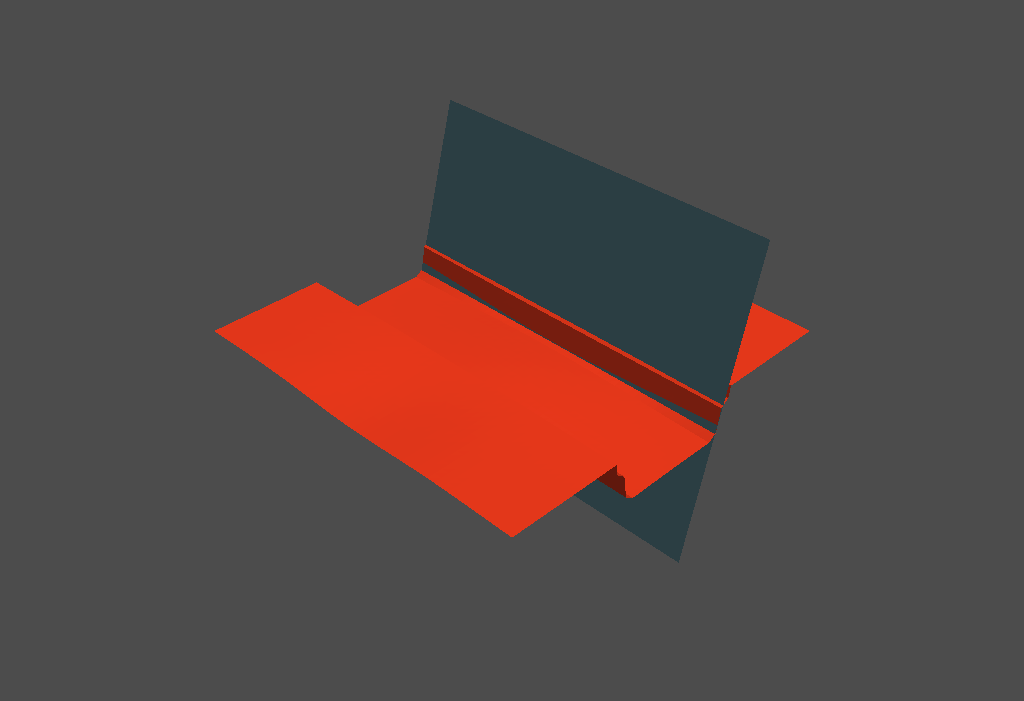

In [18]:
gpv = vista.Vista(geo_model)

gpv.plot_surface("Fault_1")
gpv.plot_surface("Shale")

gpv.show()

### Plotting geomodel bounds

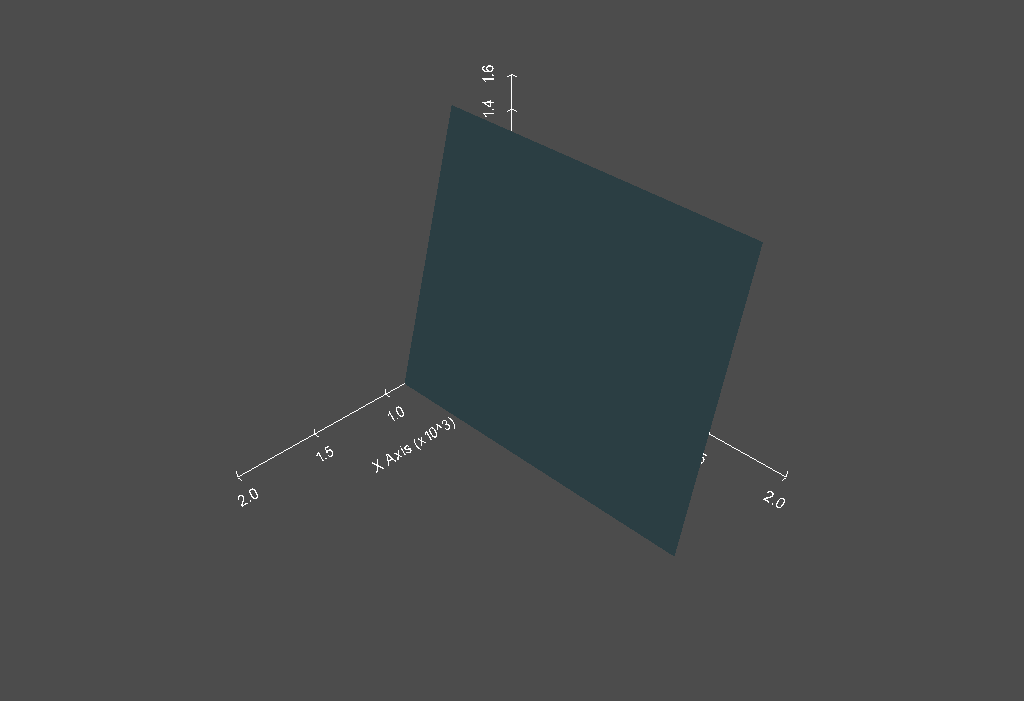

In [19]:
gpv = vista.Vista(geo_model)

gpv.plot_surface("Fault_1")
gpv.set_bounds()
gpv.show()

### Plotting input data

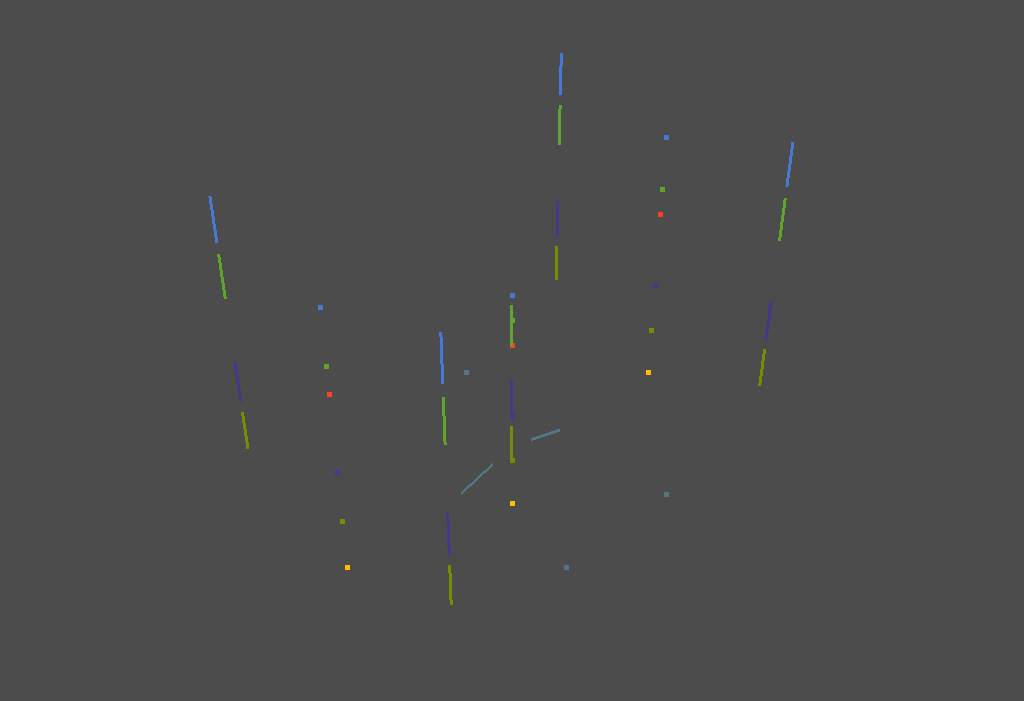

In [10]:
gpv = vista.Vista(geo_model)
gpv.plot_surface_points_all()
gpv.plot_orientations_all()
# gpv.set_bounds()
gpv.show()

### Changing surface colors

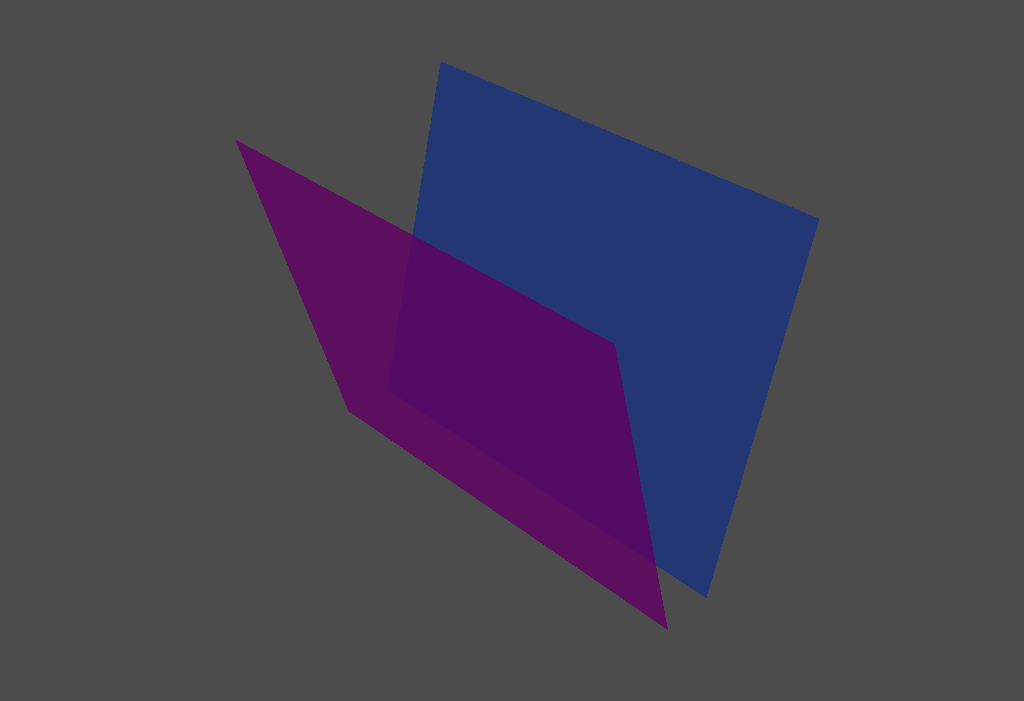

In [11]:
gpv = vista.Vista(geo_model)
gpv.plot_surface("Fault_1", opacity=1, color="Royalblue")
gpv.plot_surface("Fault_2", opacity=0.8, color="Magenta")
gpv.show()

### Plot structured grids

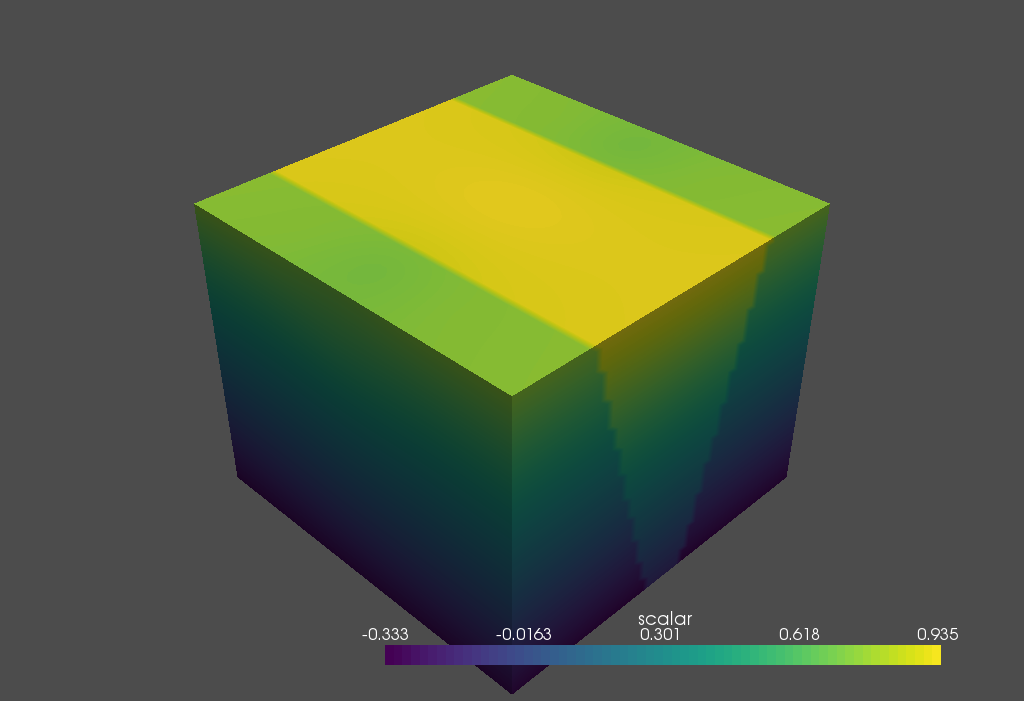

In [20]:
gpv = vista.Vista(geo_model)
gpv.plot_structured_grid("scalar", series = 'Strat_Series')
gpv.show()

### Interactive Block with cross sections

In [22]:
gp._plot.plot_interactive_3d(geo_model, name="lith", render_topography=False)

## Interactive Plotting

GemPy supports interactive plotting, meaning that you can drag & drop the input data and GemPy will update the geomodel live. This does not work in the static notebook plotter, but instead you have to pass the `notebook=False` argument to open an interactive plotting window. When running the next cell you can freely move the surface points (spheres) and orientations (arrows) of the Shale horizon and see how it updates the model. 

**Note**: Everytime you move a data point, GemPy will recompute the geomodel. This works best whe running GemPy on a dedicated graphics card (GPU). 

In [23]:
from importlib import reload
reload(vista)

<module 'gempy.plot.vista' from '../../..\\gempy\\plot\\vista.py'>

In [26]:
gpv = vista.Vista(geo_model, notebook=False)

gpv.plot_surface("Shale")
gpv.plot_surface("Fault_1", opacity=0.5)
gpv.plot_surface("Fault_2", opacity=0.5)

gpv.plot_surface_points_interactive("Shale")
gpv.plot_surface_points_interactive("Fault_1")
gpv.plot_surface_points_interactive("Fault_2")

gpv.plot_orientations_interactive("Fault_2")

gpv.show()

For the entire geomodel:

In [27]:
gpv = vista.Vista(geo_model, notebook=False)

gpv.plot_surfaces_all()
gpv.plot_surface_points_interactive_all()

gpv.show()